<a href="https://colab.research.google.com/github/Bassamelkoussa/Accident-Severity-Classification/blob/main/Dissertation_Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 2: Designing Data Preparation**

## **2.1 Import Libraries**

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# **Section 3: Features Engineering**

## **3.1 Load ML Dataset**

In [3]:
df= pd.read_csv("Loan-Dissertation.csv")

## **3.2 Inspect ML Dataset**

In [4]:
df.head()

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType
0,O_Cancelled,10000.0,201.76,10000.0,0,Car,New credit
1,O_Cancelled,10000.0,201.76,4100.0,0,Car,New credit
2,O_Cancelled,6000.0,120.00,0.0,0,Car,New credit
3,O_Accepted,6900.0,150.73,6900.0,1021,Car,New credit
4,O_Cancelled,27000.0,400.00,0.0,0,Unknown,New credit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42821 entries, 0 to 42820
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Outcome      42821 non-null  object 
 1   Amount       42821 non-null  float64
 2   MonthlyCost  42821 non-null  float64
 3   FirstCash    42821 non-null  float64
 4   CreditScore  42821 non-null  int64  
 5   LoanProduct  42821 non-null  object 
 6   LoanType     42821 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df["Outcome"].unique()

array(['O_Cancelled', 'O_Accepted', 'O_Refused'], dtype=object)

In [7]:
dic= {'O_Cancelled':0, 'O_Accepted':1, 'O_Refused':0}
df["Outcome"]=df["Outcome"].map(dic)

In [8]:
df.head()

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType
0,0,10000.0,201.76,10000.0,0,Car,New credit
1,0,10000.0,201.76,4100.0,0,Car,New credit
2,0,6000.0,120.00,0.0,0,Car,New credit
3,1,6900.0,150.73,6900.0,1021,Car,New credit
4,0,27000.0,400.00,0.0,0,Unknown,New credit


## **3.3 Exploratory Data Analysis**

## **3.3.1 Data Preparation**

In [53]:
df.nunique()

Outcome           2
Amount          661
MonthlyCost    5801
FirstCash      5912
CreditScore     520
LoanProduct      14
LoanType          2
dtype: int64

In [9]:
df["Outcome"].value_counts()

0    25593
1    17228
Name: Outcome, dtype: int64

In [73]:
df["LoanProduct"].value_counts()

Car                       12590
Home improvement          10356
Existing loan takeover     7833
Other, see explanation     3922
Unknown                    3112
Not speficied              1548
Remaining debt home        1322
Extra spending limit        768
Caravan / Camper            505
Motorcycle                  353
Boat                        270
Tax payments                200
Business goal                40
Debt restructuring            2
Name: LoanProduct, dtype: int64

In [74]:
df["LoanType"].value_counts()

New credit     38986
Limit raise     3835
Name: LoanType, dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Outcome,42821.0,0.402326,0.490373,0.00,0.00,0.00,1.0,1.00
Amount,42821.0,18492.259378,13690.631858,5000.00,8800.00,15000.00,25000.0,75000.00
MonthlyCost,42821.0,281.167448,192.373606,43.05,152.82,244.52,350.0,6673.83
FirstCash,42821.0,8374.351794,10812.477938,0.00,0.00,5000.00,12000.0,75000.00
CreditScore,42821.0,319.940707,434.109626,0.00,0.00,0.00,849.0,1145.00


In [55]:
df.isnull().sum()

Outcome        0
Amount         0
MonthlyCost    0
FirstCash      0
CreditScore    0
LoanProduct    0
LoanType       0
dtype: int64

In [57]:
print(df[df['FirstCash'] == 0]) #12,745 entries have 0 value in FirstCash

       Outcome   Amount  MonthlyCost  FirstCash  CreditScore  \
2            0   6000.0       120.00        0.0            0   
4            0  27000.0       400.00        0.0            0   
15           1  10000.0       140.00        0.0         1018   
16           0   7000.0       195.73        0.0            0   
20           0   9000.0       120.00        0.0            0   
...        ...      ...          ...        ...          ...   
42789        1  28000.0       280.00        0.0          943   
42791        0  50000.0       500.00        0.0            0   
42805        1  59000.0       590.00        0.0          982   
42807        0  25000.0       306.14        0.0            0   
42811        1   7000.0        86.00        0.0          947   

                  LoanProduct     LoanType  
2                         Car   New credit  
4                     Unknown   New credit  
15           Caravan / Camper   New credit  
16     Existing loan takeover   New credit  
20    

In [58]:
print(df[df['CreditScore'] == 0]) #27,561 entries have 0 value in CreditScore

       Outcome   Amount  MonthlyCost  FirstCash  CreditScore  \
0            0  10000.0       201.76    10000.0            0   
1            0  10000.0       201.76     4100.0            0   
2            0   6000.0       120.00        0.0            0   
4            0  27000.0       400.00        0.0            0   
6            0   6000.0       200.00      500.0            0   
...        ...      ...          ...        ...          ...   
42809        0  10000.0       355.65    10000.0            0   
42814        0  19000.0       510.82    19000.0            0   
42815        0  10000.0       106.46    10000.0            0   
42818        0  25000.0       461.78    25000.0            0   
42819        0  25000.0       461.78    25000.0            0   

                  LoanProduct    LoanType  
0                         Car  New credit  
1                         Car  New credit  
2                         Car  New credit  
4                     Unknown  New credit  
6          

## **3.3.2 Univariate Analysis**

color palette:
https://www.crispedge.com/color/83008f/

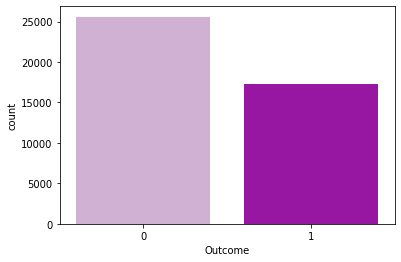

In [94]:
sns.countplot(df["Outcome"],label="Count", palette= ["#d5aad9", "#aa00b9"]) 

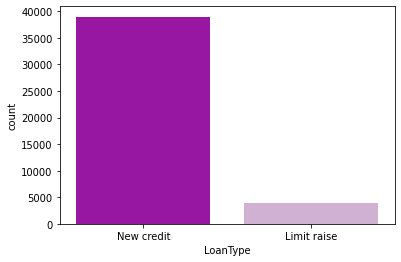

In [95]:
sns.countplot(df["LoanType"],label="Count", palette= ["#aa00b9", "#d5aad9"]) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

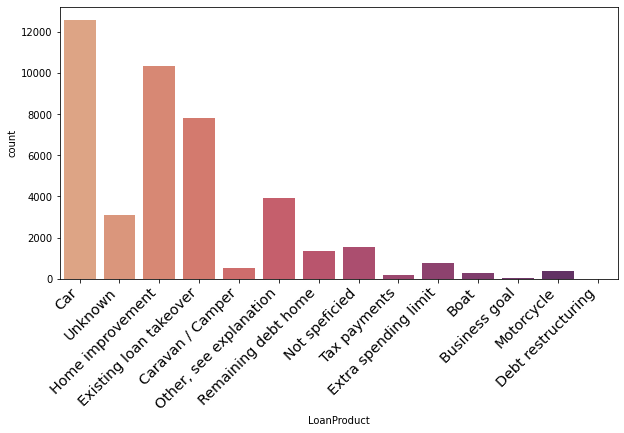

In [70]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='LoanProduct',
    palette='flare'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

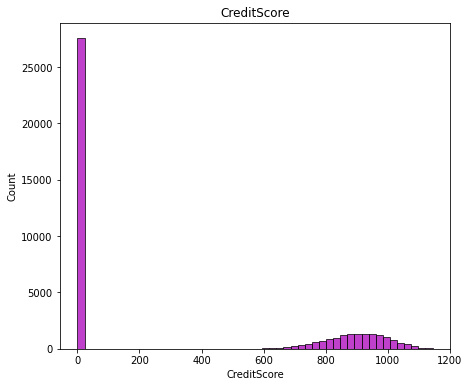

In [96]:
#high number of 0 values which is not relevant to CreditScore, missing or wrong entries
#All cases with CreditScore higher than 0 are Accepted offers, majority of 0 are rejected or cancelled
plt.figure(figsize=(7,6))
plt.title("CreditScore")
sns.histplot(df["CreditScore"], bins=50, color='#aa00b9')

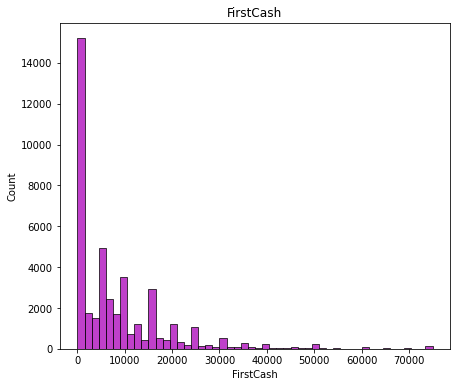

In [97]:
plt.figure(figsize=(7,6))
plt.title("FirstCash")
sns.histplot(df["FirstCash"], bins=50, color='#aa00b9')

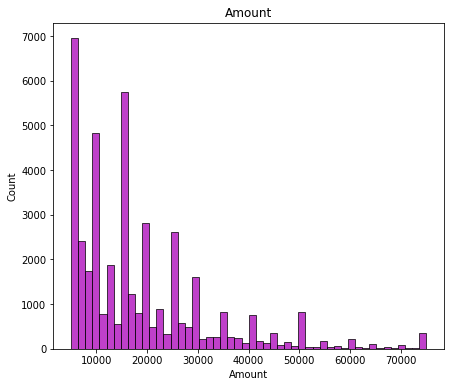

In [98]:
plt.figure(figsize=(7,6))
plt.title("Amount")
sns.histplot(df["Amount"], bins=50, color='#aa00b9')

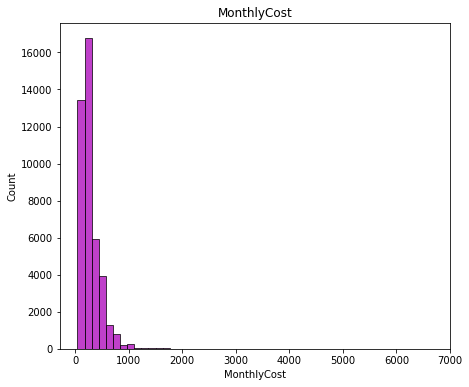

In [99]:
plt.figure(figsize=(7,6))
plt.title("MonthlyCost")
sns.histplot(df["MonthlyCost"], bins=50, color='#aa00b9')

In [78]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.CreditScore),stats.skew(df.FirstCash), 
                                       stats.skew(df.Amount), stats.skew(df.MonthlyCost) ]},
                        index=['CreditScore','FirstCash','Amount','MonthlyCost'])  
# Measure the skeweness of the required columns
Skewness

,Skewness
CreditScore,0.657017
FirstCash,2.310304
Amount,1.641825
MonthlyCost,3.476349


## **3.3.3 Bivariate Analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

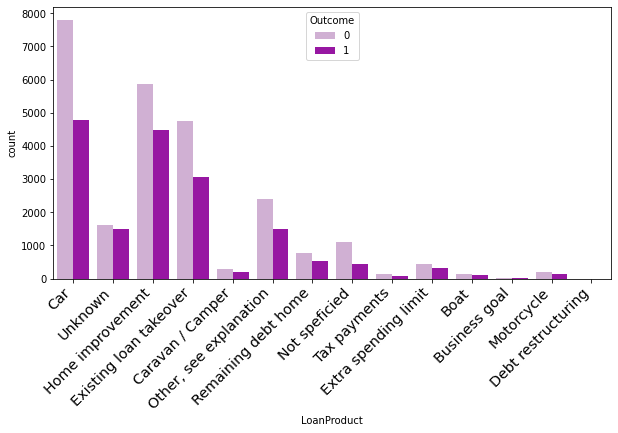

In [100]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='LoanProduct',
    hue='Outcome', palette= ["#d5aad9", "#aa00b9"]
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

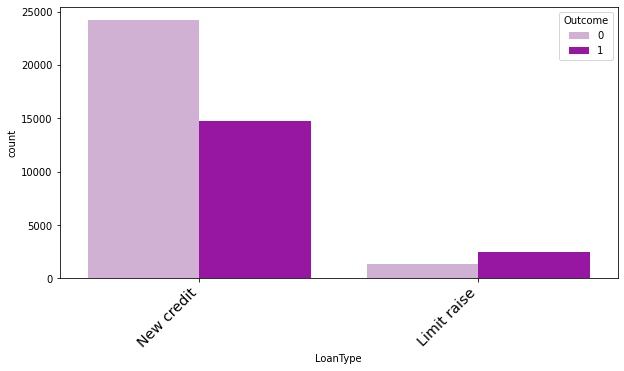

In [101]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='LoanType',
    hue='Outcome', palette= ["#d5aad9", "#aa00b9"]
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

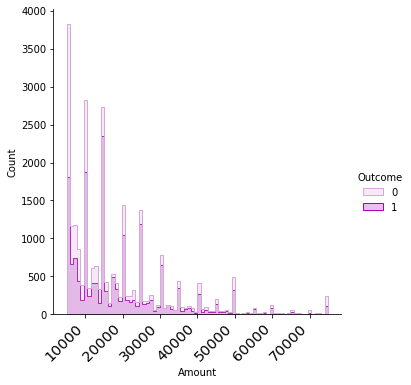

In [120]:
plt.figure()
chart = sns.displot(
    data=df,
    x='Amount',
    hue='Outcome', palette= ["#d5aad9", "#aa00b9"], element = 'step'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]), <a list of 10 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

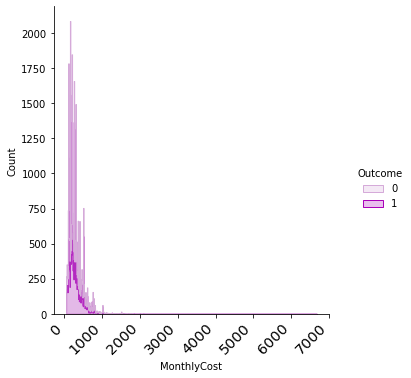

In [122]:
plt.figure()
chart = sns.displot(
    data=df,
    x='MonthlyCost',
    hue='Outcome', palette= ["#d5aad9", "#aa00b9"], element = 'step'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

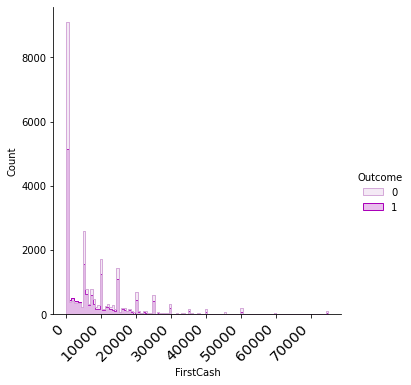

In [123]:
plt.figure()
chart = sns.displot(
    data=df,
    x='FirstCash',
    hue='Outcome', palette= ["#d5aad9", "#aa00b9"], element = 'step'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

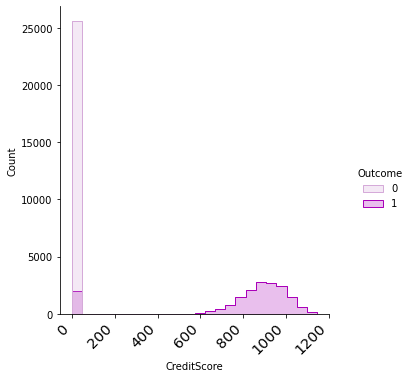

In [124]:
plt.figure()
chart = sns.displot(
    data=df,
    x='CreditScore',
    hue='Outcome', palette= ["#d5aad9", "#aa00b9"], element = 'step'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

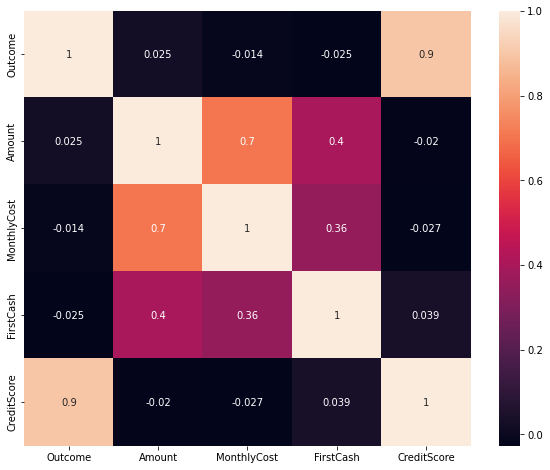

In [125]:
#Correlation Matrix, weak correlation between features and target. 
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot=True)

## **3.3.4 Multivariate Analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

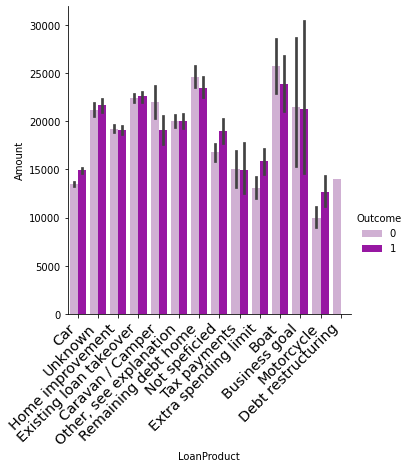

In [134]:
plt.figure()
chart = sns.catplot(data=df, x="LoanProduct", y="Amount", hue="Outcome", palette= ["#d5aad9", "#aa00b9"], kind="bar")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

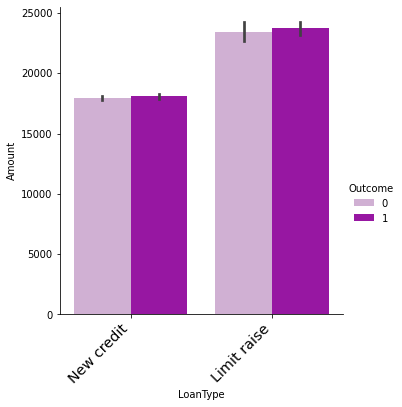

In [135]:
plt.figure()
chart = sns.catplot(data=df, x="LoanType", y="Amount", hue="Outcome", palette= ["#d5aad9", "#aa00b9"], kind="bar")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

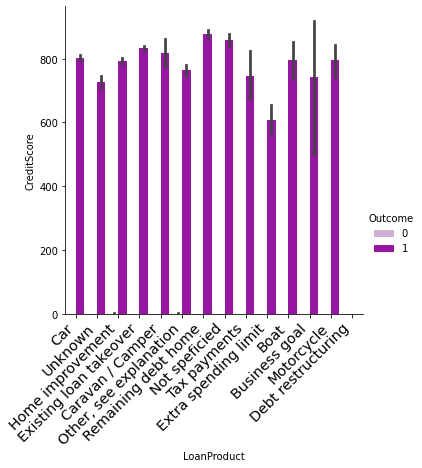

In [136]:
plt.figure()
chart = sns.catplot(data=df, x="LoanProduct", y="CreditScore", hue="Outcome", palette= ["#d5aad9", "#aa00b9"], kind="bar")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

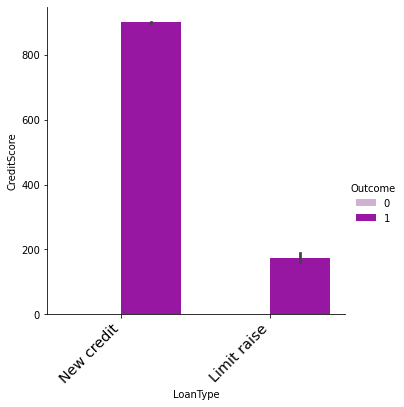

In [137]:
plt.figure()
chart = sns.catplot(data=df, x="LoanType", y="CreditScore", hue="Outcome", palette= ["#d5aad9", "#aa00b9"], kind="bar")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

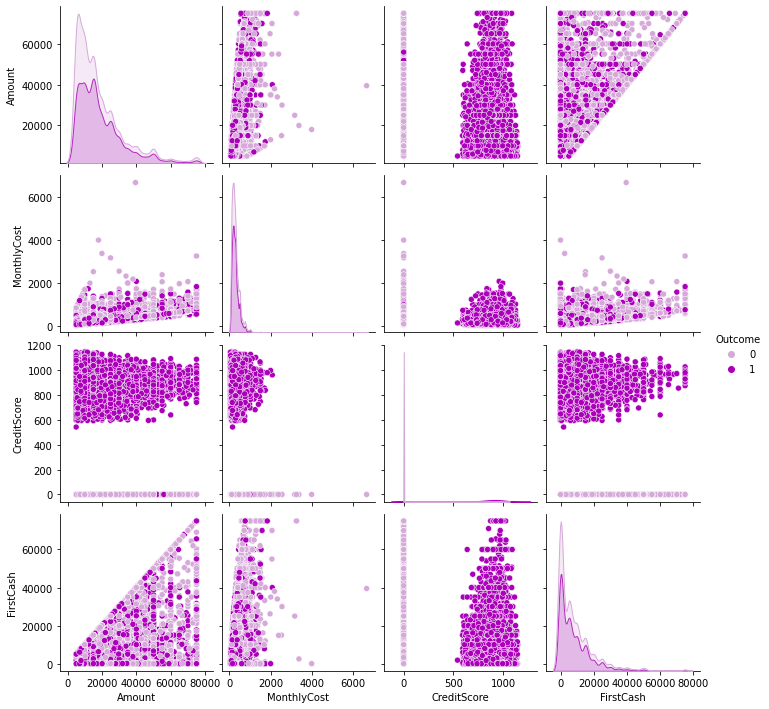

In [141]:
sns.pairplot(df, hue = 'Outcome', vars = ['Amount', 'MonthlyCost', 'CreditScore', 'FirstCash'],
             palette= ["#d5aad9", "#aa00b9"] )

## **3.3.5 Outlier Detection**

Q1 25 percentile of the given amount data is,  8800.0
Q2 50 percentile of the given amount data is,  15000.0
Q3 75 percentile of the given amount data is,  25000.0

IQR =  16200.0


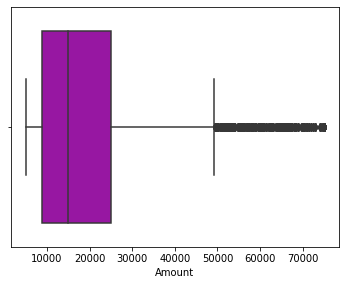

In [143]:
Q1 = np.percentile(df.Amount, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.Amount, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.Amount, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given amount data is, ', Q1) 
print('Q2 50 percentile of the given amount data is, ', Q2) 
print('Q3 75 percentile of the given amount data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.Amount, color='#aa00b9')

plt.show()

Q1 25 percentile of the given amount data is,  152.82
Q2 50 percentile of the given amount data is,  244.52
Q3 75 percentile of the given amount data is,  350.0

IQR =  197.18


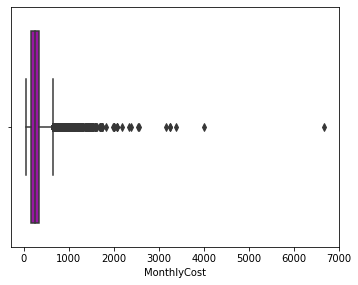

In [144]:
Q1 = np.percentile(df.MonthlyCost, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.MonthlyCost, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.MonthlyCost, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given amount data is, ', Q1) 
print('Q2 50 percentile of the given amount data is, ', Q2) 
print('Q3 75 percentile of the given amount data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.MonthlyCost, color='#aa00b9')

plt.show()

Q1 25 percentile of the given amount data is,  0.0
Q2 50 percentile of the given amount data is,  0.0
Q3 75 percentile of the given amount data is,  849.0

IQR =  849.0


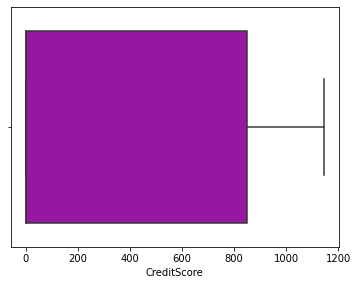

In [145]:
Q1 = np.percentile(df.CreditScore, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.CreditScore, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.CreditScore, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given amount data is, ', Q1) 
print('Q2 50 percentile of the given amount data is, ', Q2) 
print('Q3 75 percentile of the given amount data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.CreditScore, color='#aa00b9')

plt.show()

# **Section 4: Machine Learning**

## **3.4.1 Train Test Split**

In [15]:
stratified_splitter= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = list(stratified_splitter.split(df, df["Outcome"]))[0]
trainset= df.iloc[train_index]
testset= df.iloc[test_index]

In [16]:
trainset

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType
14364,0,22000.0,657.32,22000.0,0,Home improvement,New credit
26086,0,10000.0,272.29,10000.0,0,Car,New credit
34873,1,10000.0,189.08,10000.0,946,Car,New credit
39774,0,20000.0,500.00,0.0,0,Existing loan takeover,New credit
20558,0,5000.0,97.40,5000.0,0,Car,New credit
...,...,...,...,...,...,...,...
37954,0,29300.0,866.63,29300.0,0,Tax payments,New credit
27265,0,75000.0,750.00,0.0,0,Home improvement,New credit
16253,1,15000.0,300.00,0.0,0,Extra spending limit,Limit raise
29630,0,74000.0,753.49,74000.0,0,Car,New credit


In [17]:
testset

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType
21042,1,10000.0,149.19,10000.0,982,Car,New credit
38747,1,7000.0,213.95,7000.0,850,Car,New credit
15984,1,15000.0,150.00,0.0,818,Existing loan takeover,New credit
34975,1,12500.0,125.00,0.0,0,Home improvement,Limit raise
9792,1,5000.0,97.40,5000.0,837,Car,New credit
...,...,...,...,...,...,...,...
3365,1,15000.0,397.36,15000.0,937,Remaining debt home,New credit
3893,0,11100.0,212.31,7064.0,0,Not speficied,New credit
3253,1,5000.0,100.00,0.0,806,Car,New credit
9951,0,25000.0,750.00,0.0,0,Home improvement,Limit raise


## **3.4.2 Features Transformation**

In [18]:
def get_dummies(trainset,testset,old_col_name):
    one_hot_encoder=OneHotEncoder(drop="first",sparse=False)
# the input to the encoder must be a 2-d numpy array,
# so we take the column, extract their values and reshape the array to be 2-d
    cat_vals=trainset[old_col_name].values.reshape(-1,1)
# fit an encoder and transform the **trainset**
# the output is a new numpy array
    transformed=one_hot_encoder.fit_transform(cat_vals)
# in the list of new columns, convert numpy array to a list and
# drop the first column, because we requested "drop='first'"
    new_col_names=one_hot_encoder.categories_[0].tolist()[1:]
    for i,new_col_name in enumerate (new_col_names):
# put the transformed data as columns in the trainset dataframe
       trainset[new_col_name]=transformed[:,i]
# transform the **testset** using the fitted encoder
    cat_vals=testset[old_col_name].values.reshape(-1,1)
    transformed=one_hot_encoder.transform(cat_vals)
    for i, new_col_name in enumerate(new_col_names):
# put the transformed data as columns in the trainset dataframe
       testset[new_col_name]=transformed[:,i]
    return trainset, testset

for col_name in ["LoanProduct","LoanType"]:
        trainset, testset= get_dummies(trainset,testset,col_name)

# check if the dummies are produced correctly in the trainset
trainset.head()

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType,Business goal,Car,Caravan / Camper,...,Existing loan takeover,Extra spending limit,Home improvement,Motorcycle,Not speficied,"Other, see explanation",Remaining debt home,Tax payments,Unknown,New credit
14364,0,22000.0,657.32,22000.0,0,Home improvement,New credit,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26086,0,10000.0,272.29,10000.0,0,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34873,1,10000.0,189.08,10000.0,946,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39774,0,20000.0,500.00,0.0,0,Existing loan takeover,New credit,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20558,0,5000.0,97.40,5000.0,0,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
testset.head()

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType,Business goal,Car,Caravan / Camper,...,Existing loan takeover,Extra spending limit,Home improvement,Motorcycle,Not speficied,"Other, see explanation",Remaining debt home,Tax payments,Unknown,New credit
21042,1,10000.0,149.19,10000.0,982,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38747,1,7000.0,213.95,7000.0,850,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15984,1,15000.0,150.00,0.0,818,Existing loan takeover,New credit,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34975,1,12500.0,125.00,0.0,0,Home improvement,Limit raise,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9792,1,5000.0,97.40,5000.0,837,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
trainset["Outcome"].value_counts()

0    20474
1    13782
Name: Outcome, dtype: int64

In [21]:
trainset['amount_log'] = np.log(trainset.Amount + 0.01)
trainset['MonthlyCost_log'] = np.log(trainset.MonthlyCost + 0.01)
trainset['FirstCash_log'] = np.log(trainset.FirstCash + 0.01)
testset['amount_log'] = np.log(testset.Amount + 0.01)
testset['MonthlyCost_log'] = np.log(testset.MonthlyCost + 0.01)
testset['FirstCash_log'] = np.log(testset.FirstCash + 0.01)

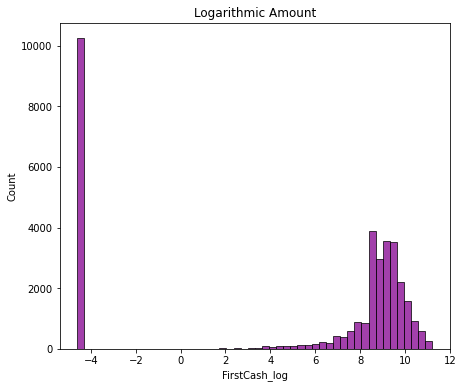

In [149]:
plt.figure(figsize=(7,6))
plt.title("Logarithmic Amount")
sns.histplot(trainset["FirstCash_log"], bins=50, color='#83008F')

In [23]:
ss = StandardScaler()
trainset['amount_standardized'] = ss.fit_transform(trainset['Amount'].values.reshape(-1,1))

In [24]:
testset['amount_standardized'] = ss.transform(testset['Amount'].values.reshape(-1,1))

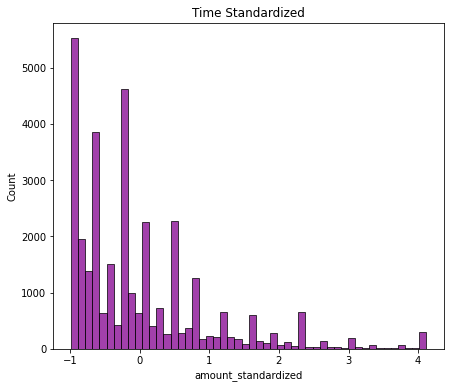

In [25]:
plt.figure(figsize=(7,6))
plt.title("Time Standardized")
sns.histplot(trainset["amount_standardized"], bins=50, color='#83008F')

In [26]:
testset.head()

,Outcome,Amount,MonthlyCost,FirstCash,CreditScore,LoanProduct,LoanType,Business goal,Car,Caravan / Camper,...,Not speficied,"Other, see explanation",Remaining debt home,Tax payments,Unknown,New credit,amount_log,MonthlyCost_log,FirstCash_log,amount_standardized
21042,1,10000.0,149.19,10000.0,982,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.210341,5.005288,9.210341,-0.620708
38747,1,7000.0,213.95,7000.0,850,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.853667,5.365789,8.853667,-0.839298
15984,1,15000.0,150.00,0.0,818,Existing loan takeover,New credit,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.615806,5.010702,-4.605170,-0.256391
34975,1,12500.0,125.00,0.0,0,Home improvement,Limit raise,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.433485,4.828394,-4.605170,-0.438550
9792,1,5000.0,97.40,5000.0,837,Car,New credit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.517195,4.578929,8.517195,-0.985024


In [27]:
cols= ["Amount","MonthlyCost","FirstCash"]
trainset=trainset.drop(cols, axis=1)
testset=testset.drop(cols, axis=1)


In [28]:
trainset.head()

,Outcome,CreditScore,LoanProduct,LoanType,Business goal,Car,Caravan / Camper,Debt restructuring,Existing loan takeover,Extra spending limit,...,Not speficied,"Other, see explanation",Remaining debt home,Tax payments,Unknown,New credit,amount_log,MonthlyCost_log,FirstCash_log,amount_standardized
14364,0,0,Home improvement,New credit,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.998798,6.488186,9.998798,0.253652
26086,0,0,Car,New credit,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.210341,5.606904,9.210341,-0.620708
34873,1,946,Car,New credit,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.210341,5.242223,9.210341,-0.620708
39774,0,0,Existing loan takeover,New credit,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.903488,6.214628,-4.605170,0.107925
20558,0,0,Car,New credit,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.517195,4.578929,8.517195,-0.985024


In [29]:
trainset['CreditScore_stand'] = ss.fit_transform(trainset['CreditScore'].values.reshape(-1,1))
testset['CreditScore_stand'] = ss.transform(testset['CreditScore'].values.reshape(-1,1))

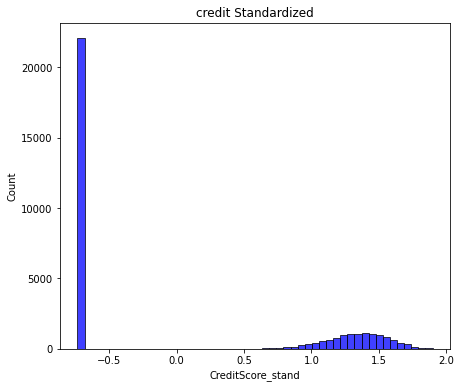

In [30]:
plt.figure(figsize=(7,6))
plt.title("credit Standardized")
sns.histplot(trainset["CreditScore_stand"], bins=50, color='blue')

In [31]:
trainset=trainset.drop("CreditScore", axis=1)
testset=testset.drop("CreditScore", axis=1)

In [32]:
Xtrain= trainset.drop('Outcome',axis=1)
ytrain = trainset["Outcome"]

Xtest= testset.drop('Outcome',axis=1)
ytest = testset["Outcome"]

In [33]:
cols=["LoanProduct","LoanType"]
Xtrain= Xtrain.drop(cols, axis=1)
Xtest= Xtest.drop(cols, axis=1)

In [150]:
Xtrain

,Business goal,Car,Caravan / Camper,Debt restructuring,Existing loan takeover,Extra spending limit,Home improvement,Motorcycle,Not speficied,"Other, see explanation",Remaining debt home,Tax payments,Unknown,New credit,amount_log,MonthlyCost_log,FirstCash_log,amount_standardized,CreditScore_stand
14364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.998798,6.488186,9.998798,0.253652,-0.736599
26086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.210341,5.606904,9.210341,-0.620708,-0.736599
34873,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.210341,5.242223,9.210341,-0.620708,1.441955
39774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.903488,6.214628,-4.605170,0.107925,-0.736599
20558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.517195,4.578929,8.517195,-0.985024,-0.736599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.285343,6.764624,10.285343,0.785554,-0.736599
27265,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.225244,6.620087,-4.605170,4.115405,-0.736599
16253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.615806,5.703816,-4.605170,-0.256391,-0.736599
29630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.211821,6.624729,11.211821,4.042542,-0.736599


In [151]:
Xtest

,Business goal,Car,Caravan / Camper,Debt restructuring,Existing loan takeover,Extra spending limit,Home improvement,Motorcycle,Not speficied,"Other, see explanation",Remaining debt home,Tax payments,Unknown,New credit,amount_log,MonthlyCost_log,FirstCash_log,amount_standardized,CreditScore_stand
21042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.210341,5.005288,9.210341,-0.620708,1.524860
38747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.853667,5.365789,8.853667,-0.839298,1.220876
15984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.615806,5.010702,-4.605170,-0.256391,1.147182
34975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.433485,4.828394,-4.605170,-0.438550,-0.736599
9792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.517195,4.578929,8.517195,-0.985024,1.190938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.615806,5.984868,9.615806,-0.256391,1.421229
3893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.314701,5.358095,8.862768,-0.540558,-0.736599
3253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.517195,4.605270,-4.605170,-0.985024,1.119547
9951,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.126632,6.620087,-4.605170,0.472241,-0.736599


## **3.4.3 Baseline ML Models**

In [159]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2', random_state=42)))
    basedModels.append(('CART' , DecisionTreeClassifier(random_state=42)))
    basedModels.append(('AB'   , AdaBoostClassifier(random_state=42)))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt', random_state=42)))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy', random_state=42)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini', random_state=42)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100, random_state=42 )))
    basedModels.append(('XGB1000'   , xgb.XGBClassifier(n_estimators= 1000, random_state=42)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models, source Kaggle
def BasedLine2(Xtrain, ytrain,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring, n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [160]:
models = GetBasedModel()
names,results = BasedLine2(Xtrain, ytrain,models) 

LR_L2: 0.969115 (0.003139)
CART: 0.964502 (0.003171)
AB: 0.968560 (0.002762)
GBM: 0.969699 (0.003153)
RF_Ent100: 0.967480 (0.002508)
RF_Gini100: 0.967334 (0.002328)
ET100: 0.966079 (0.002105)
XGB1000: 0.967538 (0.003180)


## **3.4.4 Evaluating Selected Models**

In [163]:
CART = DecisionTreeClassifier(random_state=42)
CART = CART.fit(Xtrain, ytrain)
ypred_CART = CART.predict(Xtest)
print(classification_report(ytest,ypred_CART))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5119
           1       0.95      0.96      0.95      3446

    accuracy                           0.96      8565
   macro avg       0.96      0.96      0.96      8565
weighted avg       0.96      0.96      0.96      8565



,Method,Training score,Testing score
0,DecisionTreeClassifier,0.987301,0.963573


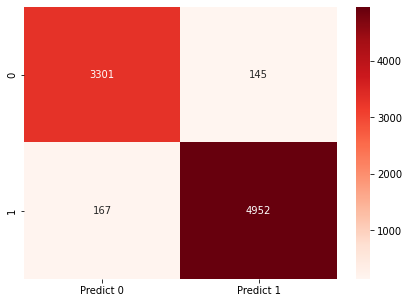

In [164]:
cm=metrics.confusion_matrix(ytest, ypred_CART, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

#Store the training & testing score results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['DecisionTreeClassifier'], 'Training score': CART.score(Xtrain, ytrain), 
                          'Testing score': CART.score(Xtest, ytest)})
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

In [165]:
GBM = GradientBoostingClassifier(n_estimators=100,max_features='sqrt', random_state=42)
GBM = GBM.fit(Xtrain, ytrain)
ypred_GBM = GBM.predict(Xtest)
print(classification_report(ytest,ypred_GBM))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5119
           1       0.94      0.98      0.96      3446

    accuracy                           0.97      8565
   macro avg       0.97      0.97      0.97      8565
weighted avg       0.97      0.97      0.97      8565



,Method,Training score,Testing score
0,DecisionTreeClassifier,0.987301,0.963573
0,GradientBoostingClassifier,0.971421,0.968943


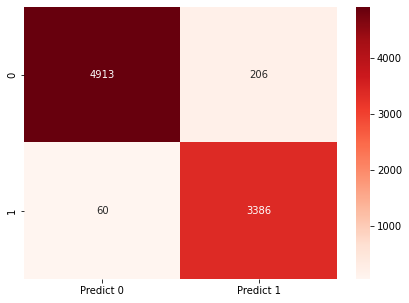

In [166]:
cm=metrics.confusion_matrix(ytest, ypred_GBM, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['GradientBoostingClassifier'], 'Training score': GBM.score(Xtrain, ytrain), 
                              'Testing score': GBM.score(Xtest, ytest)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

**WITHOUT CREDIT SCORE**

In [46]:
Xtrain_2 = Xtrain.drop("CreditScore_stand", axis=1)
Xtest_2 = Xtest.drop("CreditScore_stand", axis=1)

In [47]:
n_estimators= [100,300,500]
max_depth= [15,30]
min_samples_split=[2,4,6]
min_samples_leaf=[2,4,5]
max_features=["sqrt"]
param_grid= dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf,max_features=max_features)
halving_cv = HalvingGridSearchCV(
    estimator=RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, 
    min_resources="exhaust", factor=2, cv=5, random_state=42, scoring="accuracy")
halving_cv.fit(Xtrain_2, ytrain)

HalvingGridSearchCV(estimator=RandomForestClassifier(), factor=2, n_jobs=-1,
                    param_grid={'max_depth': [15, 30], 'max_features': ['sqrt'],
                                'min_samples_leaf': [2, 4, 5],
                                'min_samples_split': [2, 4, 6],
                                'n_estimators': [100, 300, 500]},
                    random_state=42, scoring='accuracy')

In [48]:
halving_cv.best_score_

0.633310059559477

# **BACK**

In [36]:

n_estimators= [100,300,500]
max_depth= [15,30]
min_samples_split=[2,4,6]
min_samples_leaf=[2,4,5]
max_features=["sqrt"]
param_grid= dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
halving_cv = HalvingGridSearchCV(
    estimator=RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, min_resources="exhaust", factor=2, cv=5, random_state=42, scoring="accuracy")
halving_cv.fit(Xtrain, ytrain)

HalvingGridSearchCV(estimator=RandomForestClassifier(), factor=2, n_jobs=-1,
                    param_grid={'max_depth': [15, 30], 'max_features': ['sqrt'],
                                'min_samples_leaf': [2, 4, 5],
                                'min_samples_split': [2, 4, 6],
                                'n_estimators': [100, 300, 500]},
                    random_state=42, scoring='accuracy')

In [52]:
halving_cv.best_score_

0.9683684614983558

In [38]:
y_predrf= halving_cv.predict(Xtest)

In [40]:
accuracy= metrics.accuracy_score(ytest,y_predrf)
print("accuracy-Score=", accuracy)

accuracy-Score= 0.9677758318739055


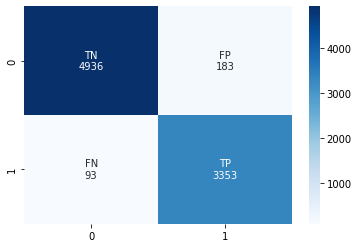

In [41]:

cf_matrix=confusion_matrix(ytest, y_predrf)
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [42]:
# put them into a separate variable for convenience
feature_importances= halving_cv.best_estimator_.feature_importances_
# the order of the features in `feature_importances` is the same as in the Xtrain dataframe
# so we can "zip" the two and print in the descending order:
for k,v in sorted(zip(feature_importances,Xtrain.columns),reverse=True):
    print(f"{v}:{k}")

CreditScore_stand:0.891464638490148
New credit:0.06066790729506059
FirstCash_log:0.016151288457844446
MonthlyCost_log:0.0090465576889511
amount_standardized:0.00825277287996642
amount_log:0.008095649796964852
Existing loan takeover:0.001194155399632148
Unknown:0.0010287007380946503
Home improvement:0.0008157742208266535
Car:0.0007228813012257435
Not speficied:0.0006954584668202693
Remaining debt home:0.0006354704584985893
Other, see explanation:0.0005074171007360959
Extra spending limit:0.0004509517280097142
Caravan / Camper:0.00010323231648888923
Tax payments:8.576939079910086e-05
Motorcycle:7.248582824844914e-05
Business goal:8.888441684303657e-06
Debt restructuring:0.0


In [50]:

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
loss= [ "deviance", "exponential"]
learning_rate= [1.0]
n_estimators=[300,500,700]
subsample=[0.6,0.7,0.8,1.0]
min_samples_split=[2,10,20]
min_samples_leaf= [5,10,15]
param_grid= dict(n_estimators=n_estimators,subsample=subsample,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
halving_cv = HalvingGridSearchCV(
    estimator=GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1, min_resources="exhaust", factor=2, cv=3)
halving_cv.fit(Xtrain,ytrain)

HalvingGridSearchCV(cv=3, estimator=GradientBoostingClassifier(), factor=2,
                    n_jobs=-1,
                    param_grid={'min_samples_leaf': [5, 10, 15],
                                'min_samples_split': [2, 10, 20],
                                'n_estimators': [300, 500, 700],
                                'subsample': [0.6, 0.7, 0.8, 1.0]})

In [51]:
halving_cv.best_score_

0.9683684614983558